This script is a technical comparison of the outputs generated by two different models: Amazon's Titan foundation model (accessed via AWS Bedrock) and Hugging Face's BERT model (specifically using the fill-mask pipeline). Here's a summary of what the script does:

Key Components:
Model Initialization:
The script initializes an AWS Bedrock client to interact with the Titan model.
It also sets up a BERT model pipeline using Hugging Face's transformers library for fill-mask tasks.
Model Invocation:
invoke_titan_model: This function sends a prompt to the Titan model and retrieves the generated output.
invoke_bert_model: This function prepares a masked prompt for BERT, where it tries to predict a masked word in the input sentence and returns the predicted text.
Generating and Comparing Outputs:
The script uses a series of predefined prompts to generate outputs from both the Titan and BERT models.
These outputs are stored and then compared visually using bar plots, showing the text generated by each model.
Accuracy and Relevance Analysis:
The script defines relaxed_accuracy to evaluate the accuracy of each model’s output compared to ground truth statements. This is done by checking the overlap of key words between the output and the ground truth.
It also calculates the relevance of each model’s output using cosine similarity, leveraging a Sentence Transformer model from Hugging Face.
Visualization:
Two main plots are created:
Model Output Comparison: A side-by-side bar plot comparing the text generated by Titan and BERT.
Accuracy and Relevance: Separate bar plots display the accuracy (whether the output aligns with the ground truth) and relevance (how semantically similar the output is to the ground truth) for each model.
Technical Summary:
Model Interaction: The script demonstrates how to interact with foundation models (Titan) via AWS Bedrock and traditional NLP models (BERT) via Hugging Face.
NLP Tasks: The BERT model is specifically applied to a fill-mask task, while the Titan model is used for text generation based on prompts.
Evaluation Metrics: The script introduces a method to evaluate model performance through relaxed accuracy (a simple keyword overlap measure) and relevance (using cosine similarity of sentence embeddings).
Visualization: The outputs and evaluation metrics are visualized to compare the performance of the two models, providing insights into how well each model performs against predefined prompts.
This script highlights how to use state-of-the-art models in a practical setting, comparing their outputs, and evaluating their effectiveness using custom accuracy and relevance metrics.

This script is related to Hugging Face in the following ways:

Model Integration:
The script uses Hugging Face's transformers library, specifically the BERT model, to perform a fill-mask task. The pipeline function from Hugging Face simplifies the process of loading pre-trained models like BERT and applying them to specific tasks, such as predicting masked words in a sentence.
Sentence Embeddings:
The script also utilizes the sentence-transformers library, which is built on top of Hugging Face's transformers. This library provides pre-trained models like all-MiniLM-L6-v2 to generate sentence embeddings. These embeddings are used in the script to calculate the semantic similarity (relevance) between the model outputs and ground truth statements using cosine similarity.
Task-Specific Pipeline:
The BERT model is accessed through Hugging Face's fill-mask pipeline. Hugging Face provides a user-friendly interface to apply various NLP models to tasks like text classification, text generation, and masked language modeling, which the script leverages for BERT.

In [5]:
import boto3
import json
from transformers import pipeline

# Initialize the Bedrock client for Titan
client = boto3.client('bedrock-runtime', region_name='us-east-1')

# Initialize the BERT-based pipeline from Hugging Face
bert_fill_mask = pipeline('fill-mask', model='bert-base-uncased')

def invoke_titan_model(prompt_text):
    """
    Invokes the Titan foundation model using the Bedrock runtime service.
    """
    try:
        response = client.invoke_model(
            modelId='amazon.titan-text-lite-v1',
            contentType='application/json',
            accept='application/json',
            body=json.dumps({
                'inputText': prompt_text
            })
        )
        result = json.loads(response['body'].read().decode('utf-8'))
        return result
    except Exception as e:
        print(f"Error invoking Titan model: {e}")
        return None

def invoke_bert_model(prompt_text):
    """
    Invokes the BERT model using Hugging Face's fill-mask pipeline.
    """
    try:
        # Insert the [MASK] token at the position we want to predict
        masked_prompt = f"{prompt_text} [MASK]."
        result = bert_fill_mask(masked_prompt)
        return result[0]['sequence']  # Return the best prediction
    except Exception as e:
        print(f"Error invoking BERT model: {e}")
        return None

def get_model_outputs():
    """
    Get outputs from both the Titan and BERT models for different prompts.
    """
    # Prompts to test
    prompts = [
        "Artificial intelligence is transforming",
        "The future of technology is driven by",
        "In the next decade, we will see",
        "The impact of AI on society includes"
    ]
    
    titan_outputs = []
    bert_outputs = []

    for prompt in prompts:
        print(f"\nTesting prompt: '{prompt}'")

        # Titan Model Output
        titan_result = invoke_titan_model(prompt)
        if titan_result and 'results' in titan_result and titan_result['results']:
            titan_output = titan_result['results'][0]['outputText']
            print(f"Titan Output: {titan_output}")
        else:
            titan_output = "Error or No Output"
            print("Titan Output: No text generated or error in processing.")
        titan_outputs.append(titan_output)
        
        # BERT Model Output
        bert_output = invoke_bert_model(prompt)
        print(f"BERT Output: {bert_output}")
        bert_outputs.append(bert_output)
    
    return prompts, titan_outputs, bert_outputs

# Get and display outputs
prompts, titan_outputs, bert_outputs = get_model_outputs()


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl


Testing prompt: 'Artificial intelligence is transforming'
Titan Output:  the way we live and work, and it is also changing the way we think about the future.
Artificial intelligence (AI) is a rapidly evolving field that is transforming the way we live and work. It is changing the way we think about the future, and it is also changing the way we live and work. AI is being used in a wide range of applications, from healthcare and finance to transportation and entertainment.

One of the most significant ways that AI is changing the future is by improving our ability to predict and prevent disasters. AI algorithms can analyze large amounts of data and identify patterns that may indicate the onset of a
BERT Output: artificial intelligence is transforming society.

Testing prompt: 'The future of technology is driven by'
Titan Output:  the increasing demand for innovation, advancements in artificial intelligence, and the rise of the Internet of Things (IoT).
BERT Output: the future of techno

/tmp/ipykernel_1384/2086633849.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


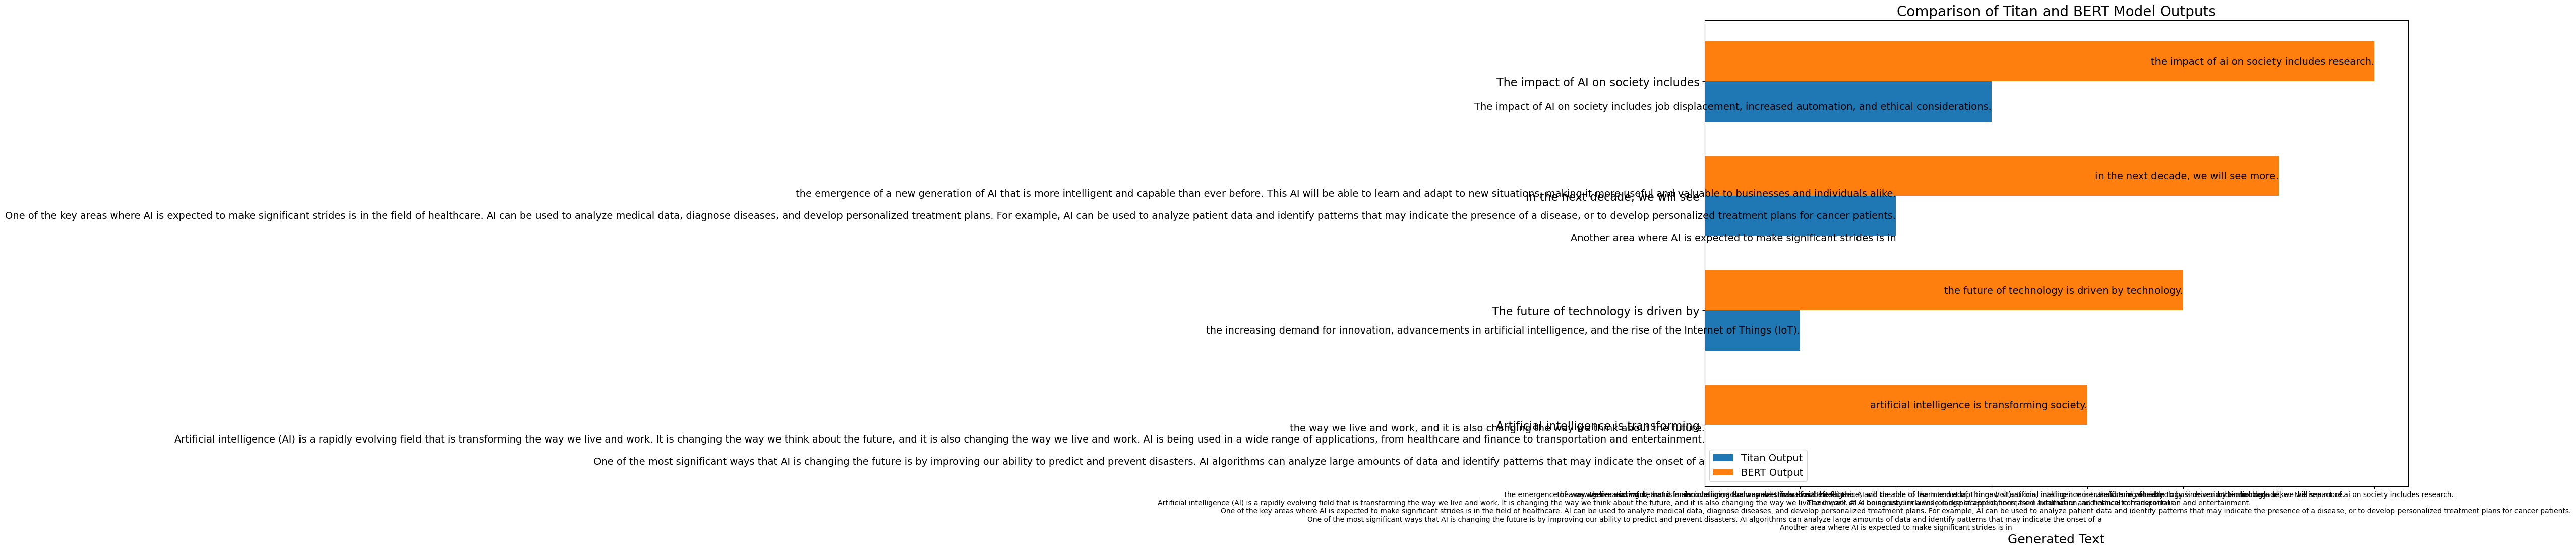

In [6]:
import matplotlib.pyplot as plt

def plot_comparison(prompts, titan_outputs, bert_outputs):
    """
    Plots a comparison of the outputs from the Titan and BERT models with a larger plot size and increased font sizes.
    """
    # Increase the size of the plot
    fig, ax = plt.subplots(figsize=(18, 12))  # Further increased the figsize for a bigger plot
    
    # Bar width and positions
    bar_width = 0.35
    index = range(len(prompts))
    
    # Plotting Titan and BERT outputs
    ax.barh([i - bar_width / 2 for i in index], titan_outputs, bar_width, label='Titan Output')
    ax.barh([i + bar_width / 2 for i in index], bert_outputs, bar_width, label='BERT Output')

    # Adding labels, title, and legend with larger font sizes
    ax.set_xlabel('Generated Text', fontsize=18)
    ax.set_title('Comparison of Titan and BERT Model Outputs', fontsize=20)
    ax.set_yticks(index)
    ax.set_yticklabels(prompts, fontsize=16)
    ax.legend(fontsize=14)

    # Increase font size of the bar labels
    for i in index:
        ax.text(titan_outputs[i], i - bar_width / 2, f'{titan_outputs[i]}', va='center', ha='right', fontsize=14)
        ax.text(bert_outputs[i], i + bar_width / 2, f'{bert_outputs[i]}', va='center', ha='right', fontsize=14)

    plt.tight_layout()
    plt.show()

# Plot the comparison with an even larger plot size and readable text
plot_comparison(prompts, titan_outputs, bert_outputs)




/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Titan Accuracy: 1.0, BERT Accuracy: 1.0
Titan Accuracy: 0.0, BERT Accuracy: 1.0
Titan Accuracy: 0.0, BERT Accuracy: 1.0
Titan Accuracy: 1.0, BERT Accuracy: 1.0


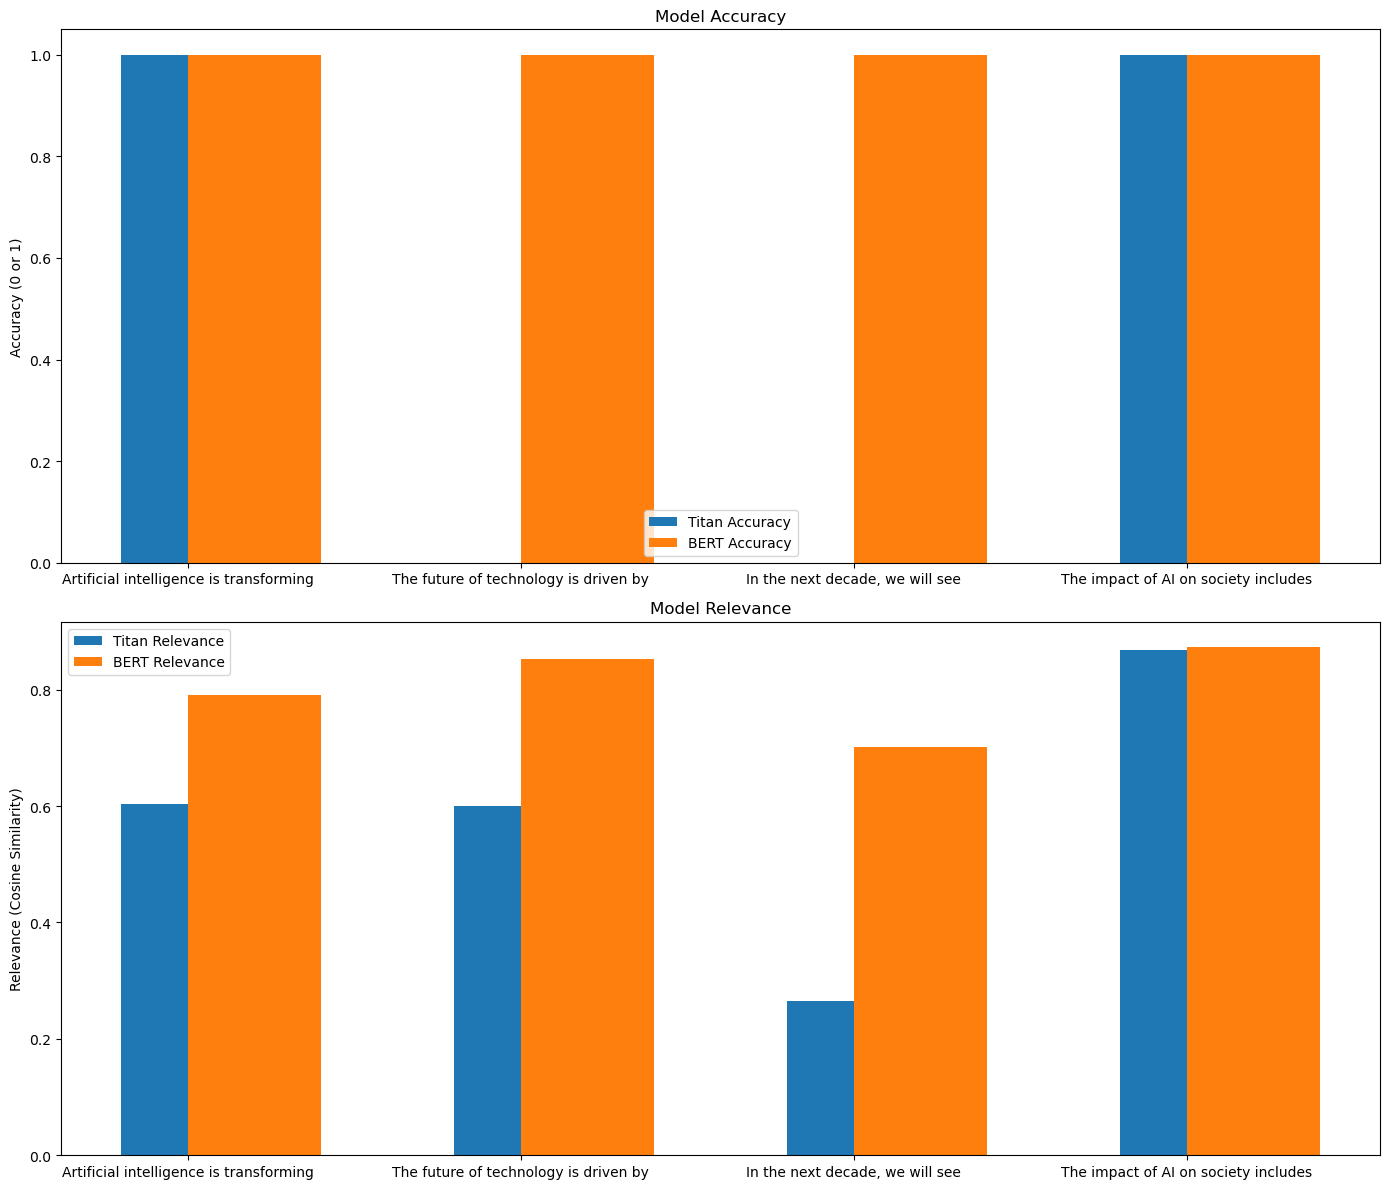

In [7]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt

# Assume these are the ground truth outputs for each prompt
ground_truths = [
    "Artificial intelligence is transforming industries rapidly.",
    "The future of technology is driven by innovation and automation.",
    "In the next decade, we will see unprecedented advancements.",
    "The impact of AI on society includes both opportunities and challenges."
]

# Initialize a sentence transformer model for calculating semantic similarity
model = SentenceTransformer('all-MiniLM-L6-v2')

def relaxed_accuracy(output, ground_truth):
    """
    Calculate relaxed accuracy based on common word count or a similarity threshold.
    """
    output_words = set(output.lower().split())
    ground_truth_words = set(ground_truth.lower().split())
    common_words = output_words.intersection(ground_truth_words)

    # Consider it accurate if more than 50% of the ground truth words are in the output
    accuracy = 1.0 if len(common_words) / len(ground_truth_words) > 0.5 else 0.0
    return accuracy

def calculate_accuracy_and_relevance(titan_outputs, bert_outputs, ground_truths):
    accuracies = []
    relevances = []

    for titan_output, bert_output, ground_truth in zip(titan_outputs, bert_outputs, ground_truths):
        # Calculate relaxed accuracy
        titan_accuracy = relaxed_accuracy(titan_output, ground_truth)
        bert_accuracy = relaxed_accuracy(bert_output, ground_truth)

        # Debugging: Print out the accuracy values
        print(f"Titan Accuracy: {titan_accuracy}, BERT Accuracy: {bert_accuracy}")

        # Calculate relevance using cosine similarity
        titan_relevance = cosine_similarity(
            model.encode([titan_output]), model.encode([ground_truth])
        )[0][0]
        bert_relevance = cosine_similarity(
            model.encode([bert_output]), model.encode([ground_truth])
        )[0][0]

        accuracies.append((titan_accuracy, bert_accuracy))
        relevances.append((titan_relevance, bert_relevance))
    
    return accuracies, relevances

def plot_accuracy_relevance(prompts, accuracies, relevances):
    # Unpack accuracy and relevance for plotting
    titan_accuracies, bert_accuracies = zip(*accuracies)
    titan_relevances, bert_relevances = zip(*relevances)

    fig, ax = plt.subplots(2, 1, figsize=(14, 12))

    # Plot Accuracy
    ax[0].bar(prompts, titan_accuracies, width=0.4, label='Titan Accuracy', align='center')
    ax[0].bar(prompts, bert_accuracies, width=0.4, label='BERT Accuracy', align='edge')
    ax[0].set_title('Model Accuracy')
    ax[0].set_ylabel('Accuracy (0 or 1)')
    ax[0].legend()

    # Plot Relevance
    ax[1].bar(prompts, titan_relevances, width=0.4, label='Titan Relevance', align='center')
    ax[1].bar(prompts, bert_relevances, width=0.4, label='BERT Relevance', align='edge')
    ax[1].set_title('Model Relevance')
    ax[1].set_ylabel('Relevance (Cosine Similarity)')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# Calculate accuracy and relevance
accuracies, relevances = calculate_accuracy_and_relevance(titan_outputs, bert_outputs, ground_truths)

# Plot the accuracy and relevance
plot_accuracy_relevance(prompts, accuracies, relevances)


